# Carrington SunPy

In [1]:
import bz2

from astropy.io import fits

import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import frames

c:\Users\lherrington\anaconda3\envs\climso\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
decompressed_file = bz2.BZ2File('data/L1/imoa_06563_l1_20240317_09343547_emi1.fts.bz2')
with fits.open(decompressed_file) as hdul:
        data = hdul[0].data

In [3]:
coord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime='2024-03-17 09:34:35',
                 observer='earth', frame=frames.Helioprojective)

In [4]:
header = sunpy.map.make_fitswcs_header(data, coord,
                                       reference_pixel=[1024, 1024]*u.pixel,
                                       scale=[1.2, 1.2]*u.arcsec/u.pixel,
                                       telescope='', instrument='',
                                       wavelength=656*u.angstrom)

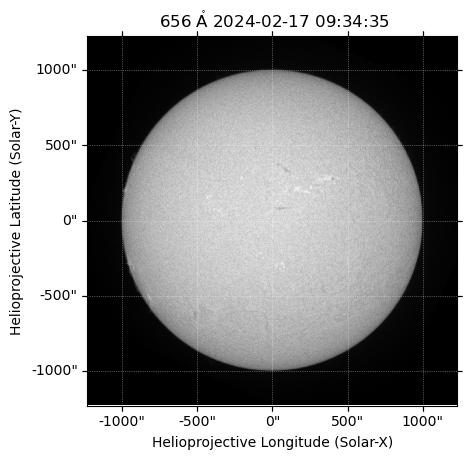

In [5]:
aia_map = sunpy.map.Map(data, header)
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax)
plt.show()

## Carrington

In [6]:
from sunpy.map.header_helper import make_heliographic_header

In [7]:
shape = (2048, 2048)
carr_header = make_heliographic_header(aia_map.date, aia_map.observer_coordinate, shape, frame='carrington')

In [8]:
outmap = aia_map.reproject_to(carr_header)

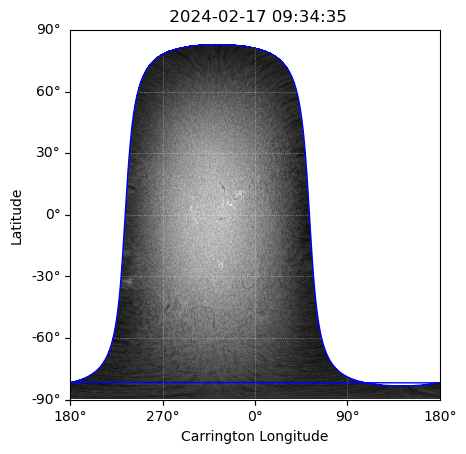

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection=outmap)
outmap.plot(axes=ax)
outmap.draw_limb(color='blue')

plt.show()